In [9]:
import os 
os.add_dll_directory("C:\\msys64\\mingw64\\bin")
# os.add_dll_directory()

<AddedDllDirectory('C:\\msys64\\mingw64\\bin')>

In [10]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
# import pybind11
# print(pybind11.__file__)

In [11]:
import os
os.add_dll_directory("C:\\msys64\\mingw64\\bin")
import PyFds

In [12]:
# Mesh1D constructors 
m = PyFds.Mesh1D(0.0,1.0,2)
m2 = PyFds.Mesh1D(start=0.0, stop=100.0, nsteps=11) 
m3 = PyFds.Mesh1D(np.linspace(0.0,1.0,400).tolist())

In [13]:
# MeshXD constructors 
mxd = PyFds.MeshXD(start = 0.0,stop = 1.0, nsteps = 11, ndims = 2)
mxd2 = PyFds.MeshXD(endpoints_list=[(0.0,1.0), (1.0,2.0)], nsteps_list=[11,11])
mxd3 = PyFds.MeshXD(m2)
mxd4 = PyFds.MeshXD(mesh1d_list=[m,m2,m3])

In [14]:
d = PyFds.Discretization1D()
d1 = PyFds.Discretization1D([x for x in range(0,20)])
d2 = PyFds.Discretization1D(m2) 

In [15]:
d2.set_init(func = lambda x : x*x)
d2.values()

array([    0.,   100.,   400.,   900.,  1600.,  2500.,  3600.,  4900.,
        6400.,  8100., 10000.])

In [16]:
print(d2.values())
d2.resize(m)
print(d2.values())

[    0.   100.   400.   900.  1600.  2500.  3600.  4900.  6400.  8100.
 10000.]
[  0. 100.]


### Wave Equation in 2D 

In [17]:
domain = PyFds.MeshXD(-10.0,10.0,51,2) 
time = PyFds.Mesh1D(0.0,5.0,51) 
ICs = [ np.zeros(domain.sizes_product()) for i in [0,1]]

interp = PyFds.Wave2D()
interp.SetDomain(domain)
interp.SetTime(time)
interp.SetIC(ICs)
interp.SetDamping(1.0)
interp.SetHeight(3.0)

In [52]:
t = 5.0
axes = np.linspace(-10,10,11)
img2D = np.array([[interp.SolAt(t, x , y) for x in axes] for y in axes])
img2D

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

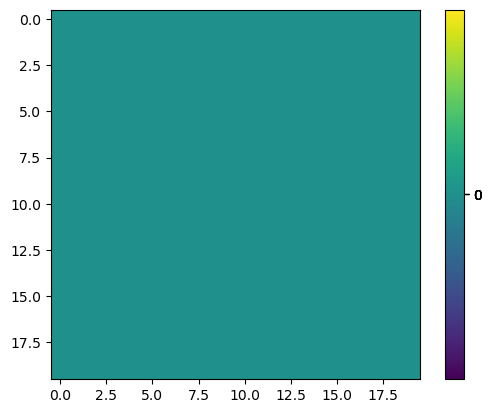

In [44]:
M = img2D.max() 
m = img2D.min() 

fig, axes = plt.subplots(1, 1)

img0 = axes.imshow(img2D, vmin=m, vmax=M)

# One shared colorbar
cbar = fig.colorbar(img0, ax=axes)
cbar.set_ticks(np.linspace(m, M, 5))

plt.show()

In [ ]:
# axes = np.linspace(-5.0,5.0,30)
# [interp.SolAt(0.0, x, 0.0) for x in axes]
# axes

array([-5.        , -4.65517241, -4.31034483, -3.96551724, -3.62068966,
       -3.27586207, -2.93103448, -2.5862069 , -2.24137931, -1.89655172,
       -1.55172414, -1.20689655, -0.86206897, -0.51724138, -0.17241379,
        0.17241379,  0.51724138,  0.86206897,  1.20689655,  1.55172414,
        1.89655172,  2.24137931,  2.5862069 ,  2.93103448,  3.27586207,
        3.62068966,  3.96551724,  4.31034483,  4.65517241,  5.        ])

[]